## Processing household income data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the DataFrame
davanagere_only = False
if davanagere_only:
    df = pd.read_pickle("pickles/household_income_davanagere.pickle")
else:
    df = pd.read_pickle("pickles/household_income_karnataka_rural.pickle")

## Processing population data

In [2]:
# Convert the dates from "%b %Y" to YYYY-MM format
df["yyyy-mm"] = pd.to_datetime(df["MONTH"], format="%b %Y").dt.strftime("%Y-%m")

In [3]:
print(df.columns.tolist())

['HH_ID', 'STATE', 'HR', 'DISTRICT', 'REGION_TYPE', 'STRATUM', 'PSU_ID', 'MONTH_SLOT', 'MONTH', 'RESPONSE_STATUS', 'REASON_FOR_NON_RESPONSE', 'HH_WEIGHT_MS', 'HH_WEIGHT_FOR_COUNTRY_MS', 'HH_WEIGHT_FOR_STATE_MS', 'HH_NON_RESPONSE_MS', 'HH_NON_RESPONSE_FOR_COUNTRY_MS', 'HH_NON_RESPONSE_FOR_STATE_MS', 'AGE_GROUP', 'OCCUPATION_GROUP', 'EDUCATION_GROUP', 'GENDER_GROUP', 'SIZE_GROUP', 'TOTAL_INCOME', 'INCOME_OF_ALL_MEMBERS_FROM_ALL_SOURCES', 'INCOME_OF_ALL_MEMBERS_FROM_WAGES', 'INCOME_OF_HOUSEHOLD_FROM_ALL_SOURCES', 'INCOME_OF_HOUSEHOLD_FROM_RENT', 'INCOME_OF_HOUSEHOLD_FROM_SELF_PRODUCTION', 'INCOME_OF_HOUSEHOLD_FROM_PRIVATE_TRANSFERS', 'INCOME_OF_HOUSEHOLD_FROM_BUSINESS_PROFIT', 'date_collected', 'INCOME_OF_ALL_MEMBERS_FROM_PENSION', 'INCOME_OF_ALL_MEMBERS_FROM_DIVIDEND', 'INCOME_OF_ALL_MEMBERS_FROM_INTEREST', 'INCOME_OF_HOUSEHOLD_FROM_GOVERNMENT_TRANSFERS', 'INCOME_OF_HOUSEHOLD_FROM_SALE_OF_ASSET', 'INCOME_OF_HOUSEHOLD_FROM_GAMBLING', 'FAMILY_SHIFTED', 'INCOME_OF_ALL_MEMBERS_FROM_FD_PF_INS

In [4]:
# Select all farmers and agricultural OCCUPATION_GROUP
farmers = df[df["OCCUPATION_GROUP"].isin(["Organised Farmers", "Agricultural Labourers", "Small/Marginal Farmers"])]

In [5]:
# Select the Jan 2014 MONTH
farmers1 = farmers[farmers["MONTH"] == "Feb 2019"]

# Count the values in that month
farmers1["OCCUPATION_GROUP"].value_counts()

OCCUPATION_GROUP
Small/Marginal Farmers    733
Organised Farmers         441
Agricultural Labourers    311
Name: count, dtype: int64

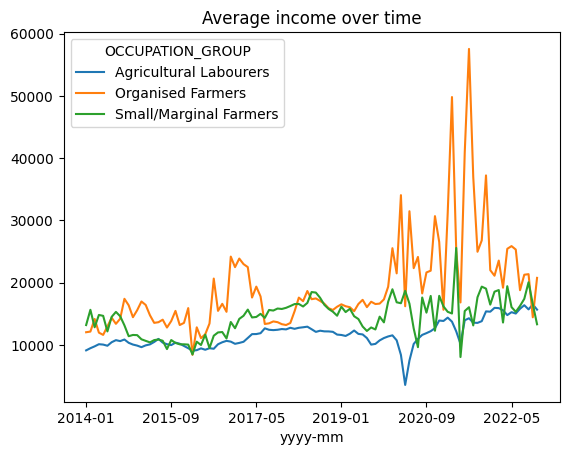

In [6]:
# Plot the distribution of income over time according to the different OCCUPATION_GROUPs
farmers.groupby(["yyyy-mm", "OCCUPATION_GROUP"])["TOTAL_INCOME"].mean().unstack().plot()
plt.title("Average income over time")
plt.savefig("images/income_over_time.png", dpi=200)

C:\Users\Ewout\AppData\Local\Temp\ipykernel_14752\754696502.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  farmers["INCOME_FROM_WAGES"] = farmers["INCOME_OF_ALL_MEMBERS_FROM_WAGES"] / farmers["TOTAL_INCOME"]


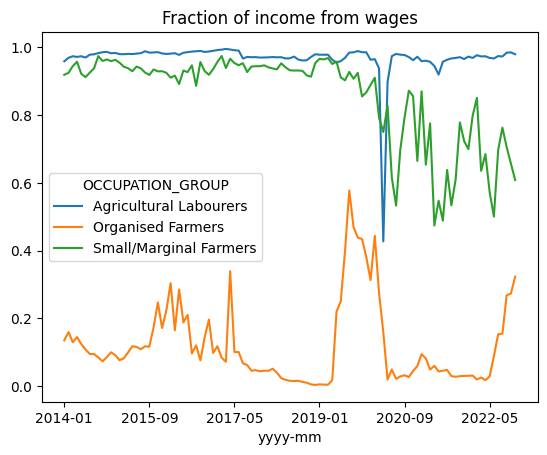

In [7]:
# Plot the percentage of income from wages (INCOME_OF_ALL_MEMBERS_FROM_WAGES divided by TOTAL_INCOME)
farmers["INCOME_FROM_WAGES"] = farmers["INCOME_OF_ALL_MEMBERS_FROM_WAGES"] / farmers["TOTAL_INCOME"]
farmers.groupby(["yyyy-mm", "OCCUPATION_GROUP"])["INCOME_FROM_WAGES"].mean().unstack().plot()
plt.title("Fraction of income from wages")
plt.savefig("images/income_from_wages.png", dpi=200)

C:\Users\Ewout\AppData\Local\Temp\ipykernel_14752\1112223996.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  farmers["INCOME_FROM_BUSINESS_PROFIT"] = farmers["INCOME_OF_HOUSEHOLD_FROM_BUSINESS_PROFIT"] / farmers["TOTAL_INCOME"]


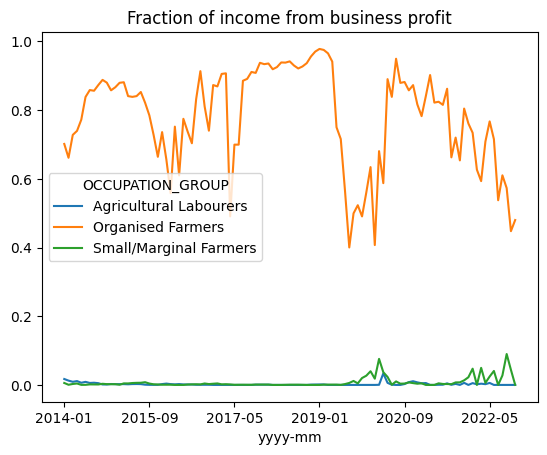

In [8]:
# Same for INCOME_OF_HOUSEHOLD_FROM_BUSINESS_PROFIT
farmers["INCOME_FROM_BUSINESS_PROFIT"] = farmers["INCOME_OF_HOUSEHOLD_FROM_BUSINESS_PROFIT"] / farmers["TOTAL_INCOME"]
farmers.groupby(["yyyy-mm", "OCCUPATION_GROUP"])["INCOME_FROM_BUSINESS_PROFIT"].mean().unstack().plot()
plt.title("Fraction of income from business profit")
plt.savefig("images/income_from_business_profit.png", dpi=200)